In [ ]:
!pip install pycaret --progress-bar off
!pip install dabl --progress-bar off
!pip install shap

In [2]:
from pycaret.classification import * # Preprocessing, modelling, interpretation, deployment...
import pandas as pd # Basic data manipulation
import dabl as db # Summary plot

In [3]:
hr_data = pd.read_csv("HR Employee Attrition.csv")

In [4]:
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Target looks like classification
Linear Discriminant Analysis training set score: 0.500


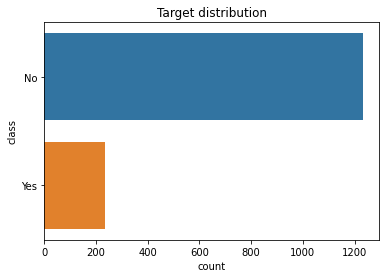

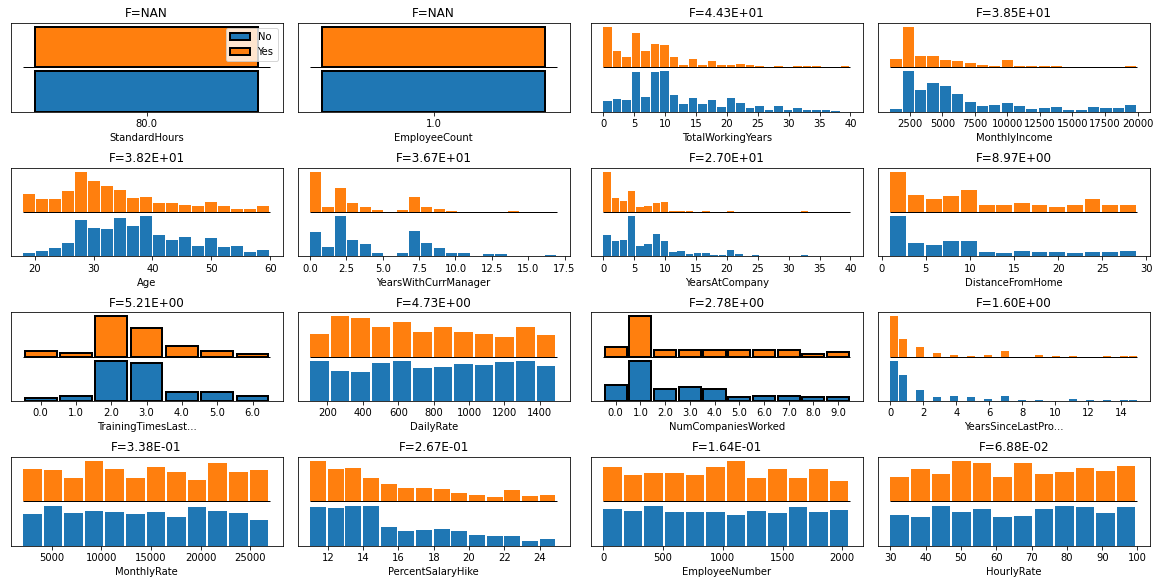

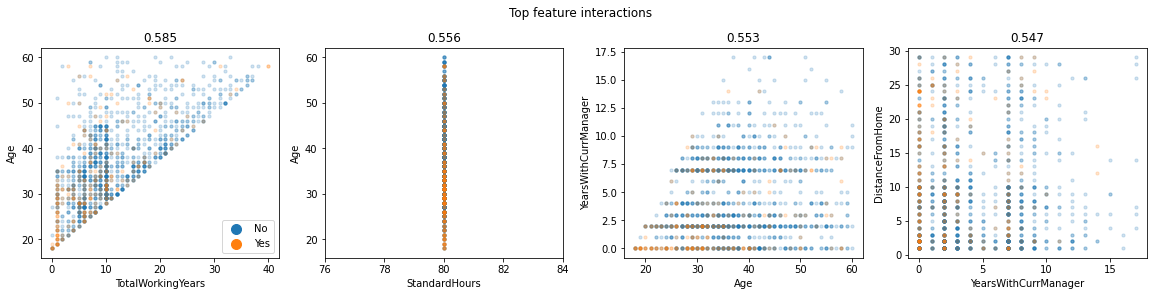

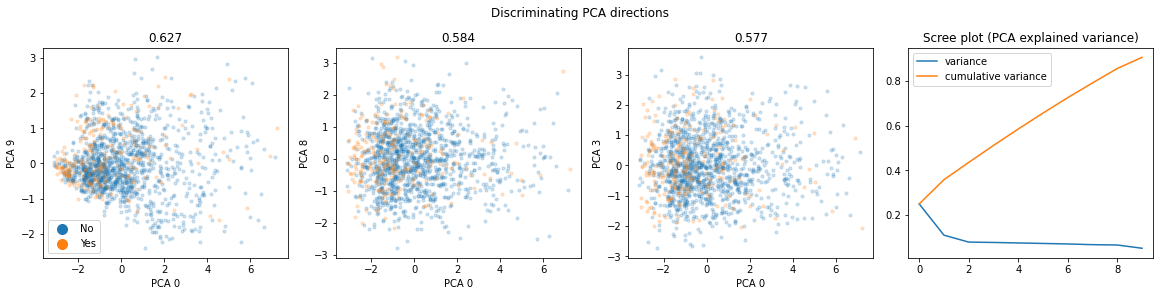

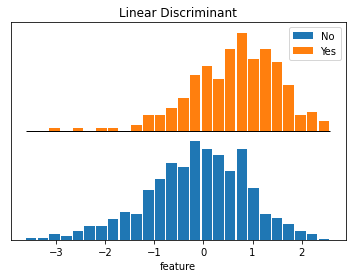

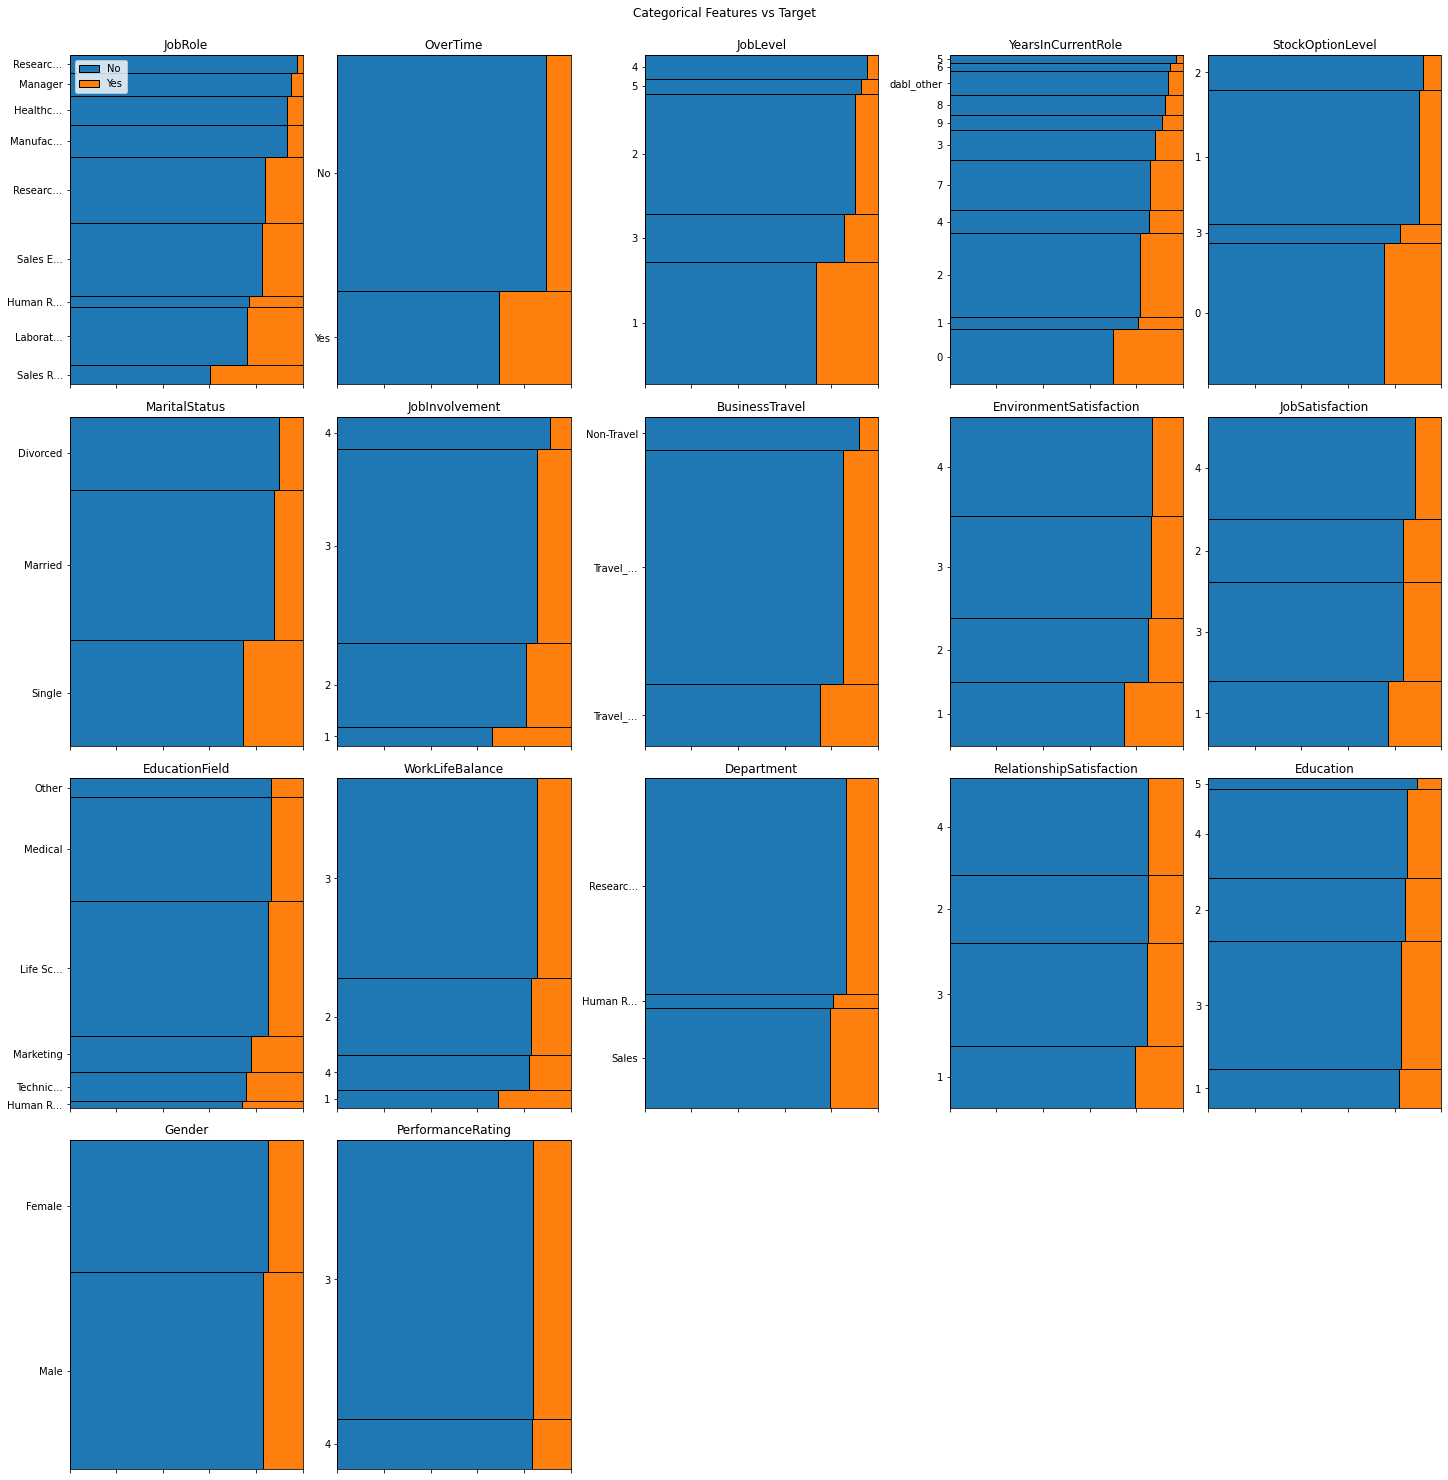

In [5]:
# Plot summaries of continuous + categorical features
## Type hints are used to force types on certain features
db.plot(hr_data, y = "Attrition", 
        type_hints = {"DistanceFromHome" : "continuous",
                      "EmployeeCount" : "continuous",
                      "HourlyRate" : "continuous",
                      "MonthlyRate" : "continuous", 
                      "NumCompaniesWorked" : "continuous", 
                      "PercentSalaryHike" : "continuous",
                      "StandardHours" : "continuous", 
                      "TotalWorkingYears" : "continuous", 
                      "YearsAtCompany" : "continuous",
                      "YearsSinceLastPromotion" : "continuous",
                      "YearsWithCurrManager" : "continuous", 
                      "TrainingTimesLastYear" : "continuous",
                      "Age" : "continuous",
                      "DailyRate" : "continuous",
                      "MonthlyIncome" : "continuous"})

In [9]:
target = "Attrition"

cont_feats = ["DistanceFromHome", "HourlyRate",  "DailyRate", "MonthlyIncome",
              "MonthlyRate", "NumCompaniesWorked", "PercentSalaryHike",
              "TotalWorkingYears", "YearsAtCompany",
              "YearsWithCurrManager", "TrainingTimesLastYear", "YearsSinceLastPromotion"]

ord_feats = {"StockOptionLevel" : ["0", "1", "2", "3"],
             "EnvironmentSatisfaction" : ["1", "2", "3", "4"],
             "JobInvolvement" : ["1", "2", "3", "4"],
             "JobSatisfaction" : ["1", "2", "3", "4"],
             "Education" : ["1", "2", "3", "4", "5"],
             "PerformanceRating" : ["3", "4"],
             "RelationshipSatisfaction" : ["1", "2", "3", "4"],
             "WorkLifeBalance" : ["1", "2", "3", "4"]}

cat_feats = ["BusinessTravel", "Department", "EducationField", "JobRole",
             "Gender", "JobLevel", "JobRole", "Over18",
             "MaritalStatus", "OverTime", "WorkLifeBalance"]

ignore = ["EmployeeNumber", "StandardHours", "EmployeeCount"]

In [28]:
setup(hr_data, target = target,
      train_size = 0.7, 
      transformation = True,
      numeric_features = cont_feats,
      categorical_features = cat_feats,
      ordinal_features = ord_feats,
      ignore_features = ignore,
      group_features = ["Age", "TotalWorkingYears"],
      normalize = True, 
      normalize_method = "robust",
      ignore_low_variance = True,
      remove_multicollinearity = True,
      data_split_stratify = True,
      silent = True)

,Description,Value
0,session_id,7871
1,Target,Attrition
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(1470, 35)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,18
8,Ordinal Features,True
9,High Cardinality Features,False


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['BusinessTravel',
                                                             'Department',
                                                             'EducationField',
                                                             'JobRole', 'Gender',
                                                             'JobLevel',
                                                             'JobRole', 'Over18',
                                                             'MaritalStatus',
                                                             'OverTime',
                                                             'WorkLifeBalance'],
                                       display_types=False,
                                       features_todrop=['EmployeeNumber',
                                                        'StandardHours',
                                        

In [29]:
compare_models(sort = "AUC")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8725,0.8352,0.3915,0.6817,0.4882,0.4236,0.4487,0.377
lda,Linear Discriminant Analysis,0.8687,0.8239,0.4096,0.6486,0.4976,0.4274,0.4444,0.035
et,Extra Trees Classifier,0.8619,0.8102,0.1879,0.7883,0.2920,0.2521,0.3336,0.523
catboost,CatBoost Classifier,0.8696,0.8098,0.2529,0.7320,0.3690,0.3233,0.3838,2.488
gbc,Gradient Boosting Classifier,0.8560,0.7991,0.2721,0.6168,0.3676,0.3039,0.3387,0.303
lightgbm,Light Gradient Boosting Machine,0.8599,0.7942,0.2713,0.6538,0.3719,0.3117,0.3537,0.121
ada,Ada Boost Classifier,0.8589,0.7868,0.3735,0.6108,0.4523,0.3787,0.3994,0.171
rf,Random Forest Classifier,0.8482,0.7768,0.1011,0.5400,0.1669,0.1361,0.1954,0.568
xgboost,Extreme Gradient Boosting,0.8511,0.7699,0.2710,0.5871,0.3607,0.2921,0.3233,0.520
nb,Naive Bayes,0.3337,0.7209,0.8607,0.1769,0.2932,0.0353,0.0880,0.025


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7871, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
lr = create_model("lr")
qda = create_model("qda")
ridge = create_model("ridge")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8835,0.0,0.2500,1.0000,0.4000,0.3602,0.4687
1,0.8932,0.0,0.4375,0.7778,0.5600,0.5046,0.5317
2,0.8447,0.0,0.1176,0.6667,0.2000,0.1583,0.2340
3,0.9029,0.0,0.4706,0.8889,0.6154,0.5658,0.6033
4,0.8641,0.0,0.1765,1.0000,0.3000,0.2635,0.3896
5,0.9029,0.0,0.4118,1.0000,0.5833,0.5389,0.6073
6,0.8641,0.0,0.2941,0.7143,0.4167,0.3545,0.3995
7,0.8641,0.0,0.1765,1.0000,0.3000,0.2635,0.3896
8,0.8725,0.0,0.2500,0.8000,0.3810,0.3310,0.4015
9,0.8431,0.0,0.1250,0.5000,0.2000,0.1464,0.1906


In [42]:
blend_models(estimator_list = [lr, ridge, qda], optimize = "AUC")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8738,0.0,0.3750,0.6667,0.4800,0.4145,0.4368
1,0.9223,0.0,0.6250,0.8333,0.7143,0.6704,0.6797
2,0.8350,0.0,0.2941,0.5000,0.3704,0.2827,0.2959
3,0.8835,0.0,0.4706,0.7273,0.5714,0.5076,0.5237
4,0.8641,0.0,0.2941,0.7143,0.4167,0.3545,0.3995
5,0.9029,0.0,0.6471,0.7333,0.6875,0.6303,0.6320
6,0.8447,0.0,0.3529,0.5455,0.4286,0.3434,0.3543
7,0.8835,0.0,0.3529,0.8571,0.5000,0.4467,0.5034
8,0.8725,0.0,0.3750,0.6667,0.4800,0.4138,0.4361
9,0.8529,0.0,0.1875,0.6000,0.2857,0.2281,0.2766


TunableVotingClassifier(estimators=[('lr',
                                     LogisticRegression(C=1.0,
                                                        class_weight=None,
                                                        dual=False,
                                                        fit_intercept=True,
                                                        intercept_scaling=1,
                                                        l1_ratio=None,
                                                        max_iter=1000,
                                                        multi_class='auto',
                                                        n_jobs=None,
                                                        penalty='l2',
                                                        random_state=7871,
                                                        solver='lbfgs',
                                                        tol=0.0001, verbose=0,
               

In [21]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
!pip install pytorch-tabnet

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor

clf = TabNetClassifier()
clf.fit(
  X_train, Y_train,
  eval_set=[(X_valid, y_valid)]
)
preds = clf.predict(X_test)